In [1]:
from base64 import b64decode

import numpy as np
import cv2
from matplotlib import pyplot as plt
from IPython.display import display, Javascript, Image, clear_output
from google.colab.output import eval_js

In [2]:
def imshow(title="Image", image=None, size=8):
    h, w = image.shape[0], image.shape[1]
    aspect_ratio = w / h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.title(title)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

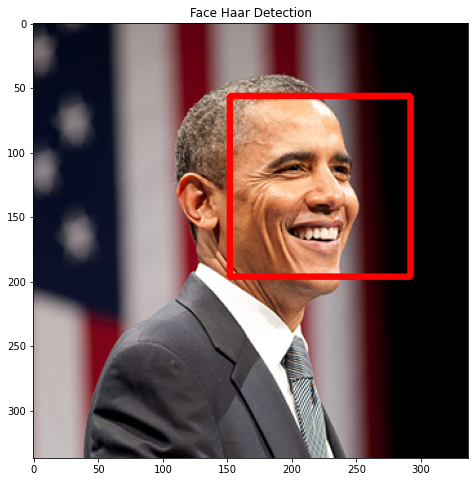

In [23]:
haar_face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
haar_eye_detector = cv2.CascadeClassifier('haarcascade_eye.xml')

image = cv2.imread('obama.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = haar_face_detector.detectMultiScale(gray, scaleFactor=1.8,
                                            minNeighbors=3)

if faces is ():
    print("No faces were found.")
else:
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 3)
    imshow("Face Haar Detection", image)

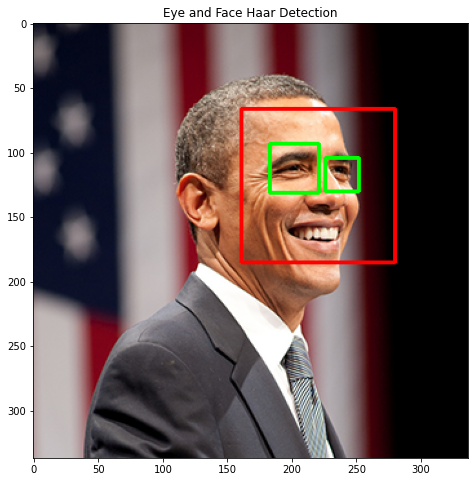

In [114]:
haar_eye_detector = cv2.CascadeClassifier('haarcascade_eye.xml')

image = cv2.imread('obama.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = haar_face_detector.detectMultiScale(gray, scaleFactor=1.3,
                                            minNeighbors=5)

if faces is ():
    print("No faces were found.")
else:
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        roi_color = image[y:y + h, x:x + w]
        roi_gray = gray[y:y + h, x:x + w]
        eyes = haar_eye_detector.detectMultiScale(roi_gray, scaleFactor=1.02,
                                                  minNeighbors=3)
        
        if eyes is ():
            print("No eyes were found.")
        else:
            for (eye_x, eye_y, eye_w, eye_h) in eyes:
                cv2.rectangle(roi_color, (eye_x, eye_y),
                              (eye_x + eye_w, eye_y + eye_h), (0, 255, 0), 2)
imshow("Eye and Face Haar Detection", image)

In [116]:
def face_detector(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = haar_face_detector.detectMultiScale(gray, scaleFactor=1.8,
                                                minNeighbors=5)
    if faces is ():
        return image
    
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        roi_color = image[y:y + h, x:x + w]
        roi_gray = gray[y:y + h, x:x + w]
        eyes = haar_eye_detector.detectMultiScale(roi_gray, 1.1, 3)
        
        if eyes is ():
            return image
        else:
            for (eye_x, eye_y, eye_w, eye_h) in eyes:
                cv2.rectangle(roi_color, (eye_x, eye_y),
                            (eye_x + eye_w, eye_y + eye_h), (0, 255, 0), 2)
            
    return image

In [5]:
def take_pic(filename='pic.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({
                video: true
            });

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize output to fit video element.
            google.colab.output.setIframeHeight(
                document.documentElement.scrollHeight, true
            );

            // Wait for capture click.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')

    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

<IPython.core.display.Javascript object>

Saved picture as: pic.jpg


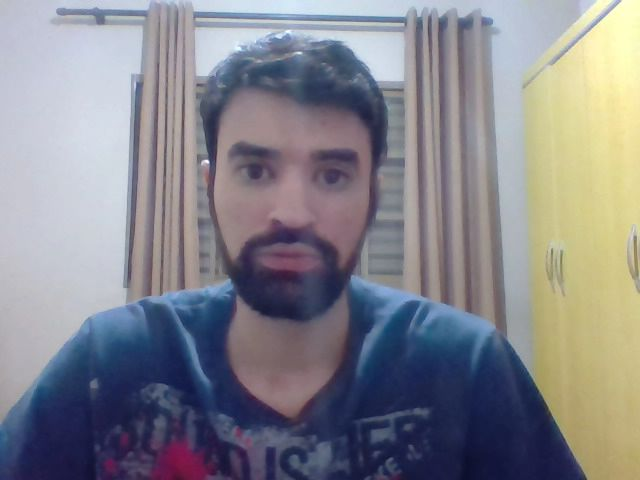

In [117]:
try:
    filename = take_pic()
    print('Saved picture as:', filename)
    display(Image(filename))
except Exception as err:
    print(str(err))

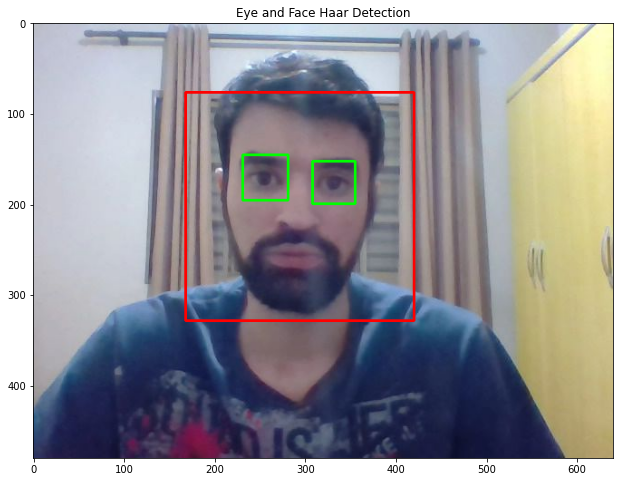

In [118]:
image = cv2.imread(filename)
imshow("Eye and Face Haar Detection", face_detector(image))